### Inspecting Datasets

In [1]:
#Load Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
#Import datasets
taxi_owners = pd.read_pickle("taxi_owners.p")
taxi_veh = pd.read_pickle("taxi_vehicles.p")
census = pd.read_pickle("census.p")
wards = pd.read_pickle("ward.p")
licenses = pd.read_pickle("licenses.p")
biz_owners = pd.read_pickle("business_owners.p")

print("*FIRST DATA TAXI OWNERS :\n",taxi_owners.head(), end='\n \n')
print("*SECOND DATA TAXI VEHICULES :\n",taxi_veh.head(), end='\n \n')
print("*THIRD DATA CENSUS :\n",census.head(), end='\n \n')
print("*FOURTH DATA WARDS :\n",wards.head(), end='\n \n')
print("*FIFTH DATA LICENSES :\n",licenses.head(), end='\n \n')
print("*SEXITH DATA BUSINESS OWNERS :\n",biz_owners.head(), end='\n \n')

*FIRST DATA TAXI OWNERS :
      rid   vid           owner                 address    zip
0  T6285  6285  AGEAN TAXI LLC     4536 N. ELSTON AVE.  60630
1  T4862  4862    MANGIB CORP.  5717 N. WASHTENAW AVE.  60659
2  T1495  1495   FUNRIDE, INC.     3351 W. ADDISON ST.  60618
3  T4231  4231    ALQUSH CORP.   6611 N. CAMPBELL AVE.  60645
4  T5971  5971  EUNIFFORD INC.     3351 W. ADDISON ST.  60618
 
*SECOND DATA TAXI VEHICULES :
     vid    make   model  year fuel_type                owner
0  2767  TOYOTA   CAMRY  2013    HYBRID       SEYED M. BADRI
1  1411  TOYOTA    RAV4  2017    HYBRID          DESZY CORP.
2  6500  NISSAN  SENTRA  2019  GASOLINE       AGAPH CAB CORP
3  2746  TOYOTA   CAMRY  2013    HYBRID  MIDWEST CAB CO, INC
4  5922  TOYOTA   CAMRY  2013    HYBRID       SUMETTI CAB CO
 
*THIRD DATA CENSUS :
   ward  pop_2000  pop_2010 change                                  address  \
0    1     52951     56149     6%              2765 WEST SAINT MARY STREET   
1    2     54361     5

In [3]:
# Print the info about DataFrames
print("About Taxis_owners \n :",taxi_owners.info(), end='\n \n')
print("About Taxis_vehicules \n :",taxi_veh.info(), end='\n \n')
print("About Census \n :",census.info(), end='\n \n')
print("About Ward \n :",wards.info(), end='\n \n')
print("About Licenses \n :",licenses.info(), end='\n \n')
print("About Business Owners \n :",biz_owners.info(), end='\n \n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3519 entries, 0 to 3518
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   rid      3519 non-null   object
 1   vid      3519 non-null   object
 2   owner    3519 non-null   object
 3   address  3519 non-null   object
 4   zip      3519 non-null   object
dtypes: object(5)
memory usage: 137.6+ KB
About Taxis_owners 
 : None
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3519 entries, 0 to 3518
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vid        3519 non-null   object
 1   make       3519 non-null   object
 2   model      3519 non-null   object
 3   year       3519 non-null   int64 
 4   fuel_type  3519 non-null   object
 5   owner      3519 non-null   object
dtypes: int64(1), object(5)
memory usage: 165.1+ KB
About Taxis_vehicules 
 : None
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries

### Inner Joins

In [4]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid')

# Print the column names of taxi_own_veh
print(taxi_own_veh.head())

     rid   vid         owner_x                 address    zip    make   model  \
0  T6285  6285  AGEAN TAXI LLC     4536 N. ELSTON AVE.  60630  NISSAN  ALTIMA   
1  T4862  4862    MANGIB CORP.  5717 N. WASHTENAW AVE.  60659   HONDA     CRV   
2  T1495  1495   FUNRIDE, INC.     3351 W. ADDISON ST.  60618  TOYOTA  SIENNA   
3  T4231  4231    ALQUSH CORP.   6611 N. CAMPBELL AVE.  60645  TOYOTA   CAMRY   
4  T5971  5971  EUNIFFORD INC.     3351 W. ADDISON ST.  60618  TOYOTA  SIENNA   

   year fuel_type         owner_y  
0  2011    HYBRID  AGEAN TAXI LLC  
1  2014  GASOLINE    MANGIB CORP.  
2  2015  GASOLINE   FUNRIDE, INC.  
3  2014    HYBRID    ALQUSH CORP.  
4  2015  GASOLINE  EUNIFFORD INC.  


In [5]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own', '_veh'))

# Print the column names of taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')


In [6]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own','_veh'))

# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64


In [7]:
# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on='ward')

# Print the shape of wards_census
print('wards_census table shape:', wards_census.shape)

wards_census table shape: (50, 9)


In [8]:
# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on='account')

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby('title').agg({'account': 'count'})

# Sort the counted_df in descending order
sorted_df = counted_df.sort_values('account', ascending=False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())


                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


### Merging multiple DataFrames

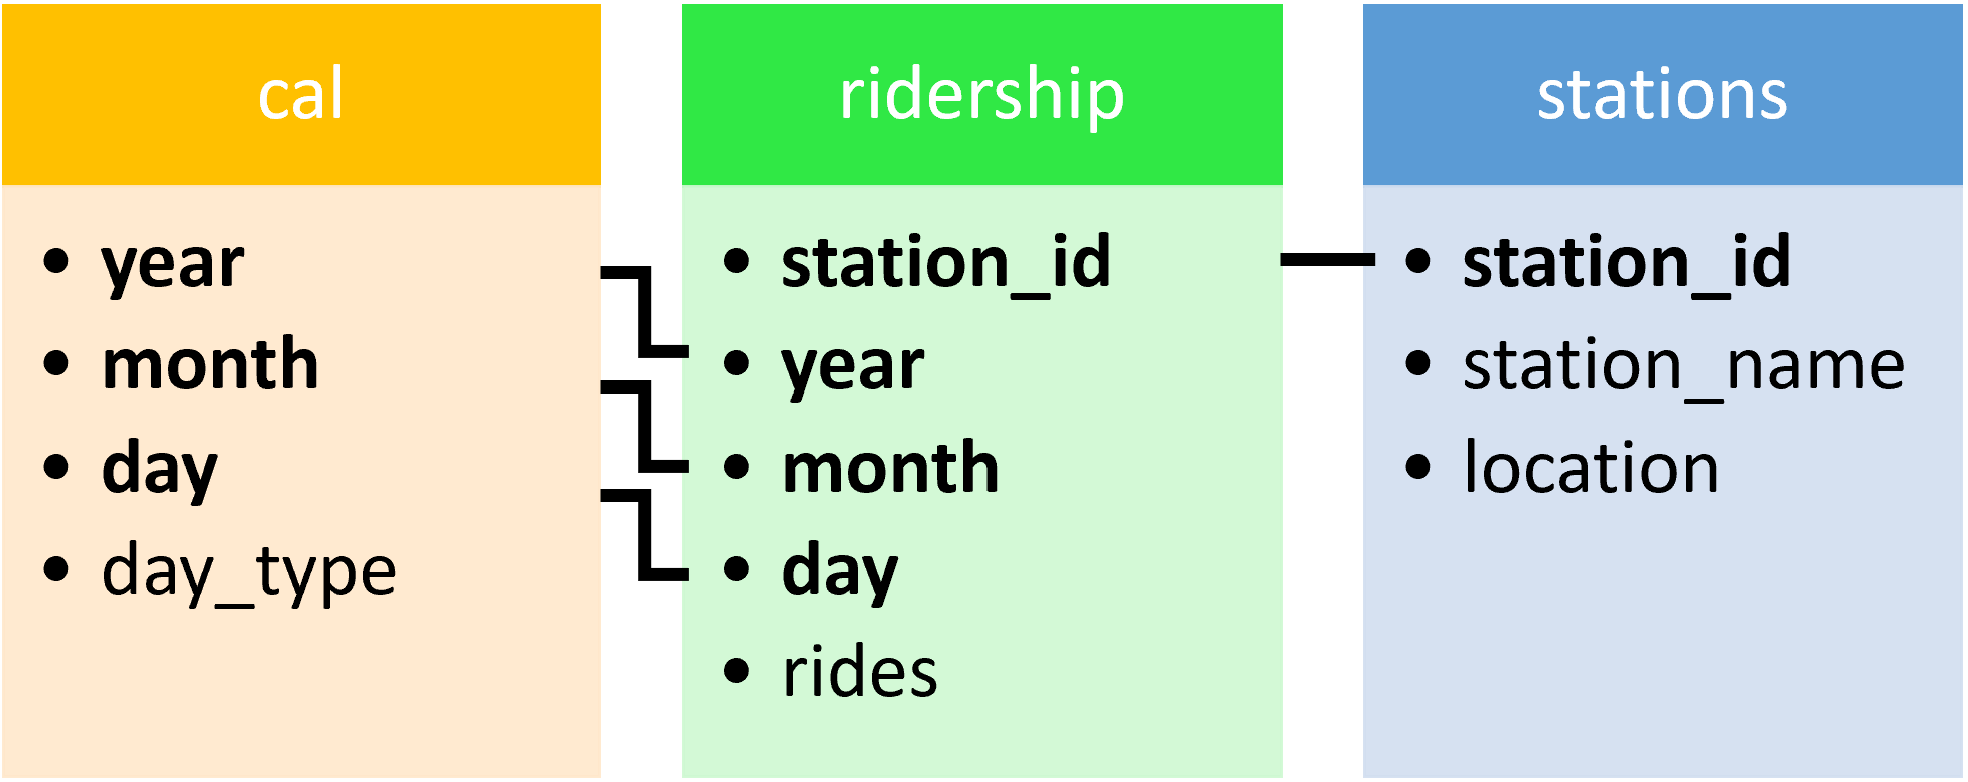

In [9]:
#Import  datasets
ridership = pd.read_pickle("cta_ridership.p")
cal = pd.read_pickle("cta_calendar.p")
stations = pd.read_pickle("stations.p")
zip_demo = pd.read_pickle("zip_demo.p")
land_use = pd.read_pickle("land_use.p")

print(ridership.head(), end='\n \n')
print(cal.head(), end='\n \n')
print(stations.head(), end='\n \n')
print(zip_demo.head(), end='\n \n')
print(land_use.head(), end='\n \n')

  station_id  year  month  day  rides
0      40010  2019      1    1    576
1      40010  2019      1    2   1457
2      40010  2019      1    3   1543
3      40010  2019      1    4   1621
4      40010  2019      1    5    719
 
   year  month  day        day_type
0  2019      1    1  Sunday/Holiday
1  2019      1    2         Weekday
2  2019      1    3         Weekday
3  2019      1    4         Weekday
4  2019      1    5        Saturday
 
  station_id        station_name                 location
0      40010  Austin-Forest Park  (41.870851, -87.776812)
1      40020         Harlem-Lake  (41.886848, -87.803176)
2      40030        Pulaski-Lake  (41.885412, -87.725404)
3      40040        Quincy/Wells   (41.878723, -87.63374)
4      40050               Davis   (42.04771, -87.683543)
 
     zip  income
0  60630   70122
1  60640   50488
2  60622   87143
3  60614  100116
4  60608   41226
 
  ward  residential  commercial  industrial  vacant  other
0    1           41           9        

In [10]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


In [11]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on='zip') \
            			.merge(wards, on='ward')

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

                             income
alderman                           
Ameya Pawar                 66246.0
Anthony A. Beale            38206.0
Anthony V. Napolitano       82226.0
Ariel E. Reyboras           41307.0
Brendan Reilly             110215.0
Brian Hopkins               87143.0
Carlos Ramirez-Rosa         66246.0
Carrie M. Austin            38206.0
Chris Taliaferro            55566.0
Daniel "Danny" Solis        41226.0
David H. Moore              33304.0
Deborah Mell                66246.0
Debra L. Silverstein        50554.0
Derrick G. Curtis           65770.0
Edward M. Burke             42335.0
Emma M. Mitts               36283.0
George Cardenas             33959.0
Gilbert Villegas            41307.0
Gregory I. Mitchell         24941.0
Harry Osterman              45442.0
Howard B. Brookins, Jr.     33304.0
James Cappleman             79565.0
Jason C. Ervin              41226.0
Joe Moore                   39163.0
John S. Arena               70122.0
Leslie A. Hairston          

In [12]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant','account','pop_2010'], 
                                             ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

   ward  pop_2010  vacant  account
47    7     51581      19       80
12   20     52372      15      123
1    10     51535      14      130
16   24     54909      13       98
7    16     51954      13      156
